# Pre-Processing Data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    StandardScaler,
)
from sklearn.model_selection import train_test_split

In [28]:
data_df = pd.read_csv('./data.csv')
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Data Imputation (Missing Data Replacement)
Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [17]:
for col in data_df.columns:
    missing_data_count = data_df[col].isna().sum()
    missing_data_percent = missing_data_count / data_df.shape[0] * 100
    print(f'Column {col} has {missing_data_percent}% missing data')

Column Country has 0.0% missing data
Column Age has 10.0% missing data
Column Salary has 10.0% missing data
Column Purchased has 0.0% missing data


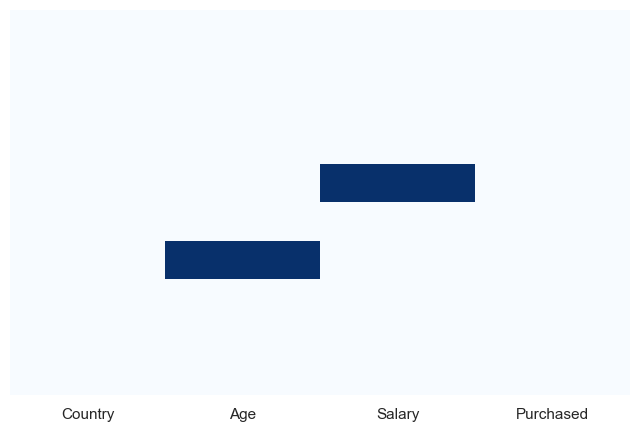

In [24]:
# Use visualization to view missing data
sns.set_theme()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data_df.isna(), cmap='Blues', cbar=False, yticklabels=False)
plt.show()

In [61]:
# ML models: Given (input, correct output), predict (input, ?)
# x (inp) -> Unknown Function ( hx ~ fx ) -> y = fx (out)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [62]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [63]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [64]:
X[:, 1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, nan],
       [35.0, 58000.0],
       [nan, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

In [ ]:
# Replace NaN cell to mean value of column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [67]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data

### Encode Independent Variable (X)

In [68]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [70]:
X # (France, Germany, Spainn, Age, Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable (y)

In [72]:
le = LabelEncoder()
y = le.fit_transform(y)

In [73]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Training Model

### Splitting the dataset into the training set and test set

In [76]:
# 80% data for training set and 20% data for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) 

In [79]:
X, y

(array([[1.0, 0.0, 0.0, 44.0, 72000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 35.0, 58000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object),
 array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1]))

In [77]:
X_train, y_train

(array([[1.0, 0.0, 0.0, 35.0, 58000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object),
 array([1, 1, 0, 1, 0, 0, 0, 1]))

In [78]:
X_test, y_test

(array([[1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0]], dtype=object),
 array([1, 0]))

In [80]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Feature Scaling

In [84]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [85]:
X_train, X_test

(array([[1.0, 0.0, 0.0, -0.39550869624216783, -0.3885295753246022],
        [0.0, 1.0, 0.0, 0.3309358478760996, 0.14314247511959055],
        [0.0, 0.0, 1.0, 0.15336051486941213, -0.940650550785879],
        [1.0, 0.0, 0.0, -0.10493087859486089, 0.43965188786731296],
        [0.0, 1.0, 0.0, -1.1219532403604355, -0.7566102256321201],
        [0.0, 1.0, 0.0, 1.7838249361126344, 1.9119744890973842],
        [1.0, 0.0, 0.0, 0.9120914831707136, 0.8997527007517103],
        [0.0, 0.0, 1.0, -1.557819966831396, -1.308731201093397]],
       dtype=object),
 array([[1.0, 0.0, 0.0, 48.00000000000001, 79000.0],
        [0.0, 0.0, 1.0, 38.00000000000001, 61000.0]], dtype=object))